# Title
The title of the notebook should be coherent with file name. Namely, file name should be:    
*author's initials_progressive number_title.ipynb*    
For example:    
*EF_01_Data Exploration.ipynb*

## Purpose
State the purpose of the notebook.

## Methodology
Quickly describe assumptions and processing steps.

## WIP - improvements
Use this section only if the notebook is not final.

Notable TODOs:
- todo 1;
- todo 2;
- todo 3.

## Results
Describe and comment the most important results.

## Suggested next steps
State suggested next steps, based on results obtained in this notebook.

# Setup

## Library import
We import all the required Python libraries

In [2]:
# Import libraries
import os
from pathlib import Path
import sklearn
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import HTML
from IPython.display import display
from ydata_profiling import ProfileReport, compare

In [3]:
import hydra
from hydra import initialize, compose
from omegaconf import OmegaConf

In [4]:
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
sns.set()

In [5]:
#hydra.core.global_hydra.GlobalHydra.instance().clear()
with initialize(config_path="../../conf", job_name="prediction", version_base="1.2"):
    conf = compose(config_name="config.yaml", return_hydra_config=True)

## Load dataset

### Load pre-processed dataset

In [6]:
from src.data.data_loader import DataSet, DatasetProperties
from src.utils.common import UtilsCommon, Features

In [7]:
f_data_cleaned = Path(os.path.join(UtilsCommon.get_project_root(), conf.loc_dirs.dir_data, conf.loc_dirs.f_name_data_oversample_feature_target_clean+'_balance.tsv'))

ds_prop_cleaned = DatasetProperties(file_path=f_data_cleaned)
ds_cleaned =  DataSet(props=ds_prop_cleaned, delimiter='\t', index_col=[0])

ds_cleaned.prop.feature_columns = Features.get_feature_columns()
ds_cleaned.prop.target_cols = Features.get_target_columns()

## Normalization and Train Test Split

### Original Dataset

In [8]:
from src.data.preprocessing import PreprocessingConfig, Preprocessing, NormalizationMethod, MissingValueMethod, OversamplingMethod
ds_cleaned.train_val_test_split(test_size=0.2, val_size=0.0, random_state=conf.project_var.seed_random)

config_preprocess = PreprocessingConfig(normalization= NormalizationMethod.MANUAL,
                                        missing_values=MissingValueMethod.MEAN, 
                                        oversampler=OversamplingMethod.SMOTE)

preprocessor_org = Preprocessing(config=config_preprocess)
x_train_norm, x_test_norm = preprocessor_org.normalize(X_train = ds_cleaned.X_train, X_test=ds_cleaned.X_test)

## ML Algos

In [9]:
from src.evaluation.metrics import Metrics, MetricName
evaluation_mat = [
    MetricName.MEAN_SQUARED_ERROR,
    MetricName.MEAN_ABSOLUTE_ERROR,
    MetricName.MEDIAN_ABSOLUTE_ERROR,
    MetricName.R2_SCORE,
    MetricName.ROOT_MEAN_SQUARED_ERROR,
    # MetricName.MEAN_SQUARED_LOG_ERROR,
    MetricName.MEAN_ABSOLUTE_PERCENTAGE_ERROR
]

### Line width

In [10]:
from  src.models.neural_net import NeuralNetConfig, NeuralNet
from src.evaluation.metrics import Metrics, MetricName
config_mlp_relu = NeuralNetConfig(
    ml_platform='sklearn',
    ml_algo='mlp',
    model_params={'alpha': 0.01, 'learning_rate': 0.0001},
    hidden_layer_size=30,
    activation='relu',
    optimizer='lbfgs',
    epochs=500,
    batch_size=32,
    loss='mse',
)
model_mlp_relu_lw = NeuralNet(config_mlp_relu)

2023-05-08 05:41:20.469860: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-08 05:41:21.100960: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [11]:
model_mlp_relu_lw.train(x_train_norm, ds_cleaned.y_train['line_width'])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          151     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.51693D+04    |proj g|=  2.58778D+02

At iterate    1    f=  2.14816D+03    |proj g|=  4.59552D+02

At iterate    2    f=  1.49083D+03    |proj g|=  2.83828D+02

At iterate    3    f=  9.44490D+02    |proj g|=  8.59502D+01

At iterate    4    f=  8.75987D+02    |proj g|=  5.21490D+01

At iterate    5    f=  8.57637D+02    |proj g|=  4.73730D+01

At iterate    6    f=  8.20927D+02    |proj g|=  3.19496D+01

At iterate    7    f=  8.03696D+02    |proj g|=  1.55447D+01

At iterate    8    f=  7.94808D+02    |proj g|=  1.00053D+01

At iterate    9    f=  7.89875D+02    |proj g|=  1.16929D+01

At iterate   10    f=  7.66282D+02    |proj g|=  1.65995D+01

At iterate   11    f=  7.35527D+02    |proj g|=  2.38079D+01

At iterate   12    f=  7.23648D+02    |proj g|=  2.36413D+01

At iterate   13    f=  7.1

 This problem is unconstrained.



At iterate   86    f=  6.02222D+02    |proj g|=  4.15685D+00

At iterate   87    f=  6.02118D+02    |proj g|=  2.85659D+00

At iterate   88    f=  6.02028D+02    |proj g|=  3.37677D+00

At iterate   89    f=  6.01833D+02    |proj g|=  3.99208D+00

At iterate   90    f=  6.01710D+02    |proj g|=  3.27163D+00

At iterate   91    f=  6.01569D+02    |proj g|=  2.45670D+00

At iterate   92    f=  6.01527D+02    |proj g|=  3.78227D+00

At iterate   93    f=  6.01446D+02    |proj g|=  3.67250D+00

At iterate   94    f=  6.01323D+02    |proj g|=  3.83562D+00

At iterate   95    f=  6.01178D+02    |proj g|=  2.61340D+00

At iterate   96    f=  6.01024D+02    |proj g|=  2.22089D+00

At iterate   97    f=  6.00943D+02    |proj g|=  2.05122D+00

At iterate   98    f=  6.00866D+02    |proj g|=  4.18298D+00

At iterate   99    f=  6.00805D+02    |proj g|=  4.05012D+00

At iterate  100    f=  6.00757D+02    |proj g|=  2.50025D+00

At iterate  101    f=  6.00697D+02    |proj g|=  2.28279D+00

At iter

/home/computeruser/anaconda3/envs/atomic/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [12]:
y_train_pred_lw =  model_mlp_relu_lw.predict(x_train_norm)
y_test_pred_lw =  model_mlp_relu_lw.predict(x_test_norm)

In [13]:
from sklearn.model_selection import cross_val_score
cv_scores_lw = cross_val_score(model_mlp_relu_lw.model, ds_cleaned.data[Features.get_feature_columns()], ds_cleaned.data[Features.get_target_columns()[0]], cv=5)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          151     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.11901D+04    |proj g|=  1.10090D+05

At iterate    1    f=  1.40488D+03    |proj g|=  5.87270D+03

At iterate    2    f=  1.26372D+03    |proj g|=  1.10511D+03

At iterate    3    f=  1.25831D+03    |proj g|=  4.56615D+02

At iterate    4    f=  1.25693D+03    |proj g|=  2.28789D+02

At iterate    5    f=  1.25662D+03    |proj g|=  4.91477D+01

At iterate    6    f=  1.25654D+03    |proj g|=  5.82736D+01

At iterate    7    f=  1.25617D+03    |proj g|=  1.86482D+02

At iterate    8    f=  1.25538D+03    |proj g|=  3.67968D+02

At iterate    9    f=  1.25316D+03    |proj g|=  7.14250D+02

At iterate   10    f=  1.24739D+03    |proj g|=  1.24232D+03

At iterate   11    f=  1.13013D+03    |proj g|=  3.47969D+03

At iterate   12    f=  1.12088D+03    |proj g|=  5.29424D+02

At iterate   13    f=  1.1

 This problem is unconstrained.



At iterate   66    f=  6.77910D+02    |proj g|=  1.73155D+03

At iterate   67    f=  6.77896D+02    |proj g|=  1.58350D+03

At iterate   68    f=  6.77887D+02    |proj g|=  1.53698D+03

At iterate   69    f=  6.77778D+02    |proj g|=  8.29277D+02

At iterate   70    f=  6.77730D+02    |proj g|=  1.04892D+02

At iterate   71    f=  6.77729D+02    |proj g|=  9.44549D+01

At iterate   72    f=  6.77723D+02    |proj g|=  6.61879D+01

At iterate   73    f=  6.77717D+02    |proj g|=  7.70263D+01

At iterate   74    f=  6.77711D+02    |proj g|=  2.38911D+02

At iterate   75    f=  6.77699D+02    |proj g|=  4.07885D+01

At iterate   76    f=  6.77695D+02    |proj g|=  6.30056D+01

At iterate   77    f=  6.77692D+02    |proj g|=  6.84665D+01

At iterate   78    f=  6.77691D+02    |proj g|=  4.62560D+01

At iterate   79    f=  6.77691D+02    |proj g|=  3.70454D+01

At iterate   80    f=  6.77690D+02    |proj g|=  5.61516D+01

At iterate   81    f=  6.77689D+02    |proj g|=  9.18791D+01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  145    f=  6.27697D+02    |proj g|=  7.74166D+03

At iterate  146    f=  6.20857D+02    |proj g|=  3.79647D+03

At iterate  147    f=  6.16669D+02    |proj g|=  6.86607D+03

At iterate  148    f=  6.16387D+02    |proj g|=  5.57684D+03

At iterate  149    f=  6.16274D+02    |proj g|=  5.02973D+03

At iterate  150    f=  6.15879D+02    |proj g|=  4.11097D+03

At iterate  151    f=  6.14728D+02    |proj g|=  4.43142D+03

At iterate  152    f=  6.14093D+02    |proj g|=  8.27530D+03

At iterate  153    f=  6.11384D+02    |proj g|=  2.11356D+03

At iterate  154    f=  6.10237D+02    |proj g|=  1.77802D+03

At iterate  155    f=  6.09791D+02    |proj g|=  3.54770D+03

At iterate  156    f=  6.09595D+02    |proj g|=  1.42199D+03

At iterate  157    f=  6.09554D+02    |proj g|=  3.29270D+02

At iterate  158    f=  6.09541D+02    |proj g|=  1.30093D+02

At iterate  159    f=  6.09539D+02    |proj g|=  1.38040D+02

At iterate  160    f=  6.09530D+02    |proj g|=  3.33249D+02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate  144    f=  1.15263D+03    |proj g|=  4.43189D+02

At iterate  145    f=  1.15220D+03    |proj g|=  1.76728D+03

At iterate  146    f=  1.15020D+03    |proj g|=  8.07406D+03

At iterate  147    f=  1.15005D+03    |proj g|=  6.71450D+03

At iterate  148    f=  1.14981D+03    |proj g|=  3.31466D+03

At iterate  149    f=  1.14918D+03    |proj g|=  1.48233D+03

At iterate  150    f=  1.14916D+03    |proj g|=  8.85966D+02

At iterate  151    f=  1.14902D+03    |proj g|=  2.27769D+03

At iterate  152    f=  1.14872D+03    |proj g|=  2.06675D+03

At iterate  153    f=  1.14861D+03    |proj g|=  1.97003D+03

At iterate  154    f=  1.14805D+03    |proj g|=  3.08487D+03

At iterate  155    f=  1.14798D+03    |proj g|=  2.53278D+03

At iterate  156    f=  1.14764D+03    |proj g|=  1.72409D+03

At iterate  157    f=  1.14752D+03    |proj g|=  1.21922D+03

At iterate  158    f=  1.14749D+03    |proj g|=  1.20701D+03

At iterate  159    f=  1.14745D+03    |proj g|=  1.04663D+03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   67    f=  1.27940D+03    |proj g|=  2.20127D+03

At iterate   68    f=  1.27916D+03    |proj g|=  2.91640D+02

At iterate   69    f=  1.27916D+03    |proj g|=  9.52889D+01

At iterate   70    f=  1.27916D+03    |proj g|=  5.70719D+01

At iterate   71    f=  1.27913D+03    |proj g|=  3.69662D+02

At iterate   72    f=  1.27909D+03    |proj g|=  9.11824D+02

At iterate   73    f=  1.27899D+03    |proj g|=  1.17674D+03

At iterate   74    f=  1.27892D+03    |proj g|=  8.50794D+02

At iterate   75    f=  1.27873D+03    |proj g|=  3.48623D+02

At iterate   76    f=  1.27868D+03    |proj g|=  3.87237D+02

At iterate   77    f=  1.27867D+03    |proj g|=  4.01409D+02

At iterate   78    f=  1.27839D+03    |proj g|=  2.73757D+02

At iterate   79    f=  1.27760D+03    |proj g|=  2.55519D+03

At iterate   80    f=  1.27748D+03    |proj g|=  8.11563D+02

At iterate   81    f=  1.27727D+03    |proj g|=  5.66807D+02

At iterate   82    f=  1.27721D+03    |proj g|=  5.48440D+02

At iter

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   14    f=  1.70475D+03    |proj g|=  9.41222D+02

At iterate   15    f=  1.70338D+03    |proj g|=  7.49769D+02

At iterate   16    f=  1.69924D+03    |proj g|=  8.87022D+02

At iterate   17    f=  1.39970D+03    |proj g|=  1.01452D+04

At iterate   18    f=  1.36538D+03    |proj g|=  1.01604D+03

At iterate   19    f=  1.36390D+03    |proj g|=  1.28889D+03

At iterate   20    f=  1.36186D+03    |proj g|=  4.33914D+03

At iterate   21    f=  1.35925D+03    |proj g|=  2.83324D+03

At iterate   22    f=  1.35434D+03    |proj g|=  5.69193D+02

At iterate   23    f=  1.35400D+03    |proj g|=  1.40547D+02

At iterate   24    f=  1.35392D+03    |proj g|=  1.45902D+02

At iterate   25    f=  1.35363D+03    |proj g|=  2.49306D+02

At iterate   26    f=  1.35152D+03    |proj g|=  1.94995D+03

At iterate   27    f=  1.34850D+03    |proj g|=  4.10802D+03

At iterate   28    f=  1.30915D+03    |proj g|=  7.62313D+03

At iterate   29    f=  1.30909D+03    |proj g|=  7.67801D+03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


In [14]:
cv_scores_lw

array([-0.27645443,  0.30813954, -0.08472446,  0.23143055,  0.39781556])

In [15]:
model_mlp_relu_eval_train_lw = model_mlp_relu_lw.evaluate(x_train_norm, ds_cleaned.y_train['line_width'], evaluation_mat)
model_mlp_relu_eval_test_lw = model_mlp_relu_lw.evaluate(x_test_norm, ds_cleaned.y_test['line_width'], evaluation_mat)

In [16]:
print(model_mlp_relu_eval_train_lw)
print(model_mlp_relu_eval_test_lw)


{'mean_squared_error': 1179.461973820521, 'mean_absolute_error': 21.454290345084175, 'median_absolute_error': 14.129505185006067, 'r2_score': 0.6493337968415799, 'root_mean_squared_error': 34.3432959079428, 'mean_absolute_percentage_error': 7.859296604009916}
{'mean_squared_error': 667.3200393366636, 'mean_absolute_error': 20.42511352949256, 'median_absolute_error': 16.007013034235626, 'r2_score': 0.7378260715020966, 'root_mean_squared_error': 25.832538383532185, 'mean_absolute_percentage_error': 8.577201710504017}


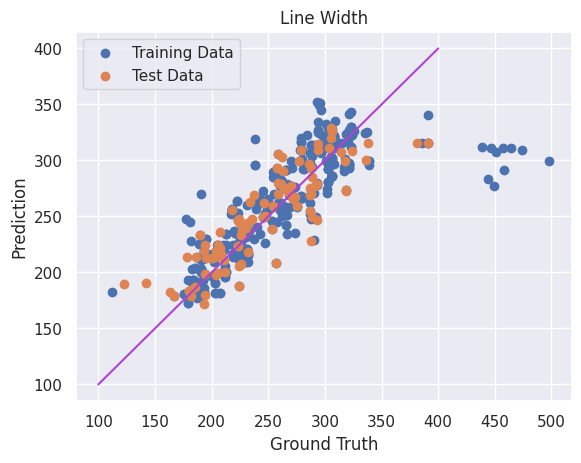

In [17]:
plt.scatter(ds_cleaned.y_train['line_width'], y_train_pred_lw, label='Training Data')
plt.scatter(ds_cleaned.y_test['line_width'], y_test_pred_lw,label='Test Data')
x = [100,400]
y = [100,400]
plt.plot(x,y, color = '#b043d1')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.title('Line Width')
plt.legend()
plt.show()

### Roughness

In [18]:
from  src.models.neural_net import NeuralNetConfig, NeuralNet
from src.evaluation.metrics import Metrics, MetricName
config_mlp_relu = NeuralNetConfig(
    ml_platform='sklearn',
    ml_algo='mlp',
    model_params={'alpha': 0.01, 'learning_rate': 0.0001},
    hidden_layer_size=30,
    activation='relu',
    optimizer='lbfgs',
    epochs=500,
    batch_size=32,
    loss='mse',
)
model_mlp_relu_rough = NeuralNet(config_mlp_relu)

In [19]:
model_mlp_relu_rough.train(x_train_norm, ds_cleaned.y_train['roughness'])

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          151     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.30269D+03    |proj g|=  1.15462D+02

At iterate    1    f=  6.41159D+02    |proj g|=  1.04088D+02

At iterate    2    f=  4.85503D+02    |proj g|=  7.03205D+01

At iterate    3    f=  3.80462D+02    |proj g|=  1.65121D+01

At iterate    4    f=  3.72018D+02    |proj g|=  1.45779D+01

At iterate    5    f=  3.58240D+02    |proj g|=  2.60987D+01

At iterate    6    f=  3.46104D+02    |proj g|=  2.22294D+01

At iterate    7    f=  3.25655D+02    |proj g|=  1.42084D+01

At iterate    8    f=  3.18409D+02    |proj g|=  1.04816D+01

At iterate    9    f=  3.05902D+02    |proj g|=  7.20832D+00

At iterate   10    f=  2.96866D+02    |proj g|=  3.99651D+00

At iterate   11    f=  2.93875D+02    |proj g|=  5.74218D+00

At iterate   12    f=  2.91716D+02    |proj g|=  3.73655D+00

At iterate   13    f=  2.9

/home/computeruser/anaconda3/envs/atomic/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [20]:
y_train_pred_rough =  model_mlp_relu_rough.predict(x_train_norm)
y_test_pred_rough =  model_mlp_relu_rough.predict(x_test_norm)

In [21]:
from sklearn.model_selection import cross_val_score
cv_scores_rough = cross_val_score(model_mlp_relu_rough.model, ds_cleaned.data[Features.get_feature_columns()], ds_cleaned.data[Features.get_target_columns()[0]], cv=5)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          151     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.11901D+04    |proj g|=  1.10090D+05

At iterate    1    f=  1.40488D+03    |proj g|=  5.87270D+03

At iterate    2    f=  1.26372D+03    |proj g|=  1.10511D+03

At iterate    3    f=  1.25831D+03    |proj g|=  4.56615D+02

At iterate    4    f=  1.25693D+03    |proj g|=  2.28789D+02

At iterate    5    f=  1.25662D+03    |proj g|=  4.91477D+01

At iterate    6    f=  1.25654D+03    |proj g|=  5.82736D+01

At iterate    7    f=  1.25617D+03    |proj g|=  1.86482D+02

At iterate    8    f=  1.25538D+03    |proj g|=  3.67968D+02

At iterate    9    f=  1.25316D+03    |proj g|=  7.14250D+02

At iterate   10    f=  1.24739D+03    |proj g|=  1.24232D+03

At iterate   11    f=  1.13013D+03    |proj g|=  3.47969D+03

At iterate   12    f=  1.12088D+03    |proj g|=  5.29424D+02

At iterate   13    f=  1.1

 This problem is unconstrained.



At iterate   35    f=  7.21530D+02    |proj g|=  4.39612D+03

At iterate   36    f=  7.17259D+02    |proj g|=  2.91675D+03

At iterate   37    f=  7.10597D+02    |proj g|=  2.78929D+03

At iterate   38    f=  7.06542D+02    |proj g|=  9.36872D+02

At iterate   39    f=  7.05354D+02    |proj g|=  1.13968D+03

At iterate   40    f=  7.04994D+02    |proj g|=  7.04724D+02

At iterate   41    f=  7.01937D+02    |proj g|=  6.28419D+02

At iterate   42    f=  6.97076D+02    |proj g|=  2.67846D+03

At iterate   43    f=  6.89285D+02    |proj g|=  8.90671D+03

At iterate   44    f=  6.83304D+02    |proj g|=  3.20491D+03

At iterate   45    f=  6.82348D+02    |proj g|=  2.44734D+03

At iterate   46    f=  6.81651D+02    |proj g|=  1.07869D+03

At iterate   47    f=  6.81438D+02    |proj g|=  1.37750D+03

At iterate   48    f=  6.81411D+02    |proj g|=  7.71139D+02

At iterate   49    f=  6.80982D+02    |proj g|=  3.86044D+02

At iterate   50    f=  6.80877D+02    |proj g|=  8.66344D+02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  191    f=  5.93718D+02    |proj g|=  1.26255D+02

At iterate  192    f=  5.93717D+02    |proj g|=  1.63228D+02

At iterate  193    f=  5.93717D+02    |proj g|=  1.93859D+02

At iterate  194    f=  5.93716D+02    |proj g|=  2.15409D+02

At iterate  195    f=  5.93711D+02    |proj g|=  3.52536D+02

At iterate  196    f=  5.93699D+02    |proj g|=  6.32385D+02

At iterate  197    f=  5.93684D+02    |proj g|=  9.36655D+02

At iterate  198    f=  5.93660D+02    |proj g|=  8.50543D+02

At iterate  199    f=  5.93620D+02    |proj g|=  6.06816D+02

At iterate  200    f=  5.93599D+02    |proj g|=  3.77243D+02

At iterate  201    f=  5.93580D+02    |proj g|=  3.66459D+02

At iterate  202    f=  5.93572D+02    |proj g|=  3.81598D+02

At iterate  203    f=  5.93572D+02    |proj g|=  3.81751D+02

At iterate  204    f=  5.93572D+02    |proj g|=  3.81750D+02

At iterate  205    f=  5.93572D+02    |proj g|=  3.81750D+02

           * * *

Tit   = total number of iterations
Tnf   = total nu


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   69    f=  1.26797D+03    |proj g|=  2.92789D+02

At iterate   70    f=  1.26772D+03    |proj g|=  6.68885D+02

At iterate   71    f=  1.26722D+03    |proj g|=  2.63402D+03

At iterate   72    f=  1.26620D+03    |proj g|=  3.43590D+03

At iterate   73    f=  1.25141D+03    |proj g|=  8.96666D+03

At iterate   74    f=  1.25051D+03    |proj g|=  7.45949D+03

At iterate   75    f=  1.24303D+03    |proj g|=  2.17432D+03

At iterate   76    f=  1.22992D+03    |proj g|=  1.94952D+03

At iterate   77    f=  1.22710D+03    |proj g|=  6.40208D+03

At iterate   78    f=  1.22544D+03    |proj g|=  1.79505D+03

At iterate   79    f=  1.22398D+03    |proj g|=  5.48646D+03

At iterate   80    f=  1.22243D+03    |proj g|=  4.99895D+03

At iterate   81    f=  1.22034D+03    |proj g|=  2.89789D+03

At iterate   82    f=  1.21784D+03    |proj g|=  1.43300D+03

At iterate   83    f=  1.21744D+03    |proj g|=  1.12295D+03

At iterate   84    f=  1.21732D+03    |proj g|=  1.06871D+03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          151     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.86485D+04    |proj g|=  1.16131D+05

At iterate    1    f=  2.00521D+03    |proj g|=  4.76057D+03

At iterate    2    f=  1.91382D+03    |proj g|=  6.78462D+02

At iterate    3    f=  1.91182D+03    |proj g|=  5.01326D+01

At iterate    4    f=  1.91169D+03    |proj g|=  6.28116D+01

At iterate    5    f=  1.91073D+03    |proj g|=  2.98753D+02

At iterate    6    f=  1.90846D+03    |proj g|=  6.48790D+02

At iterate    7    f=  1.90267D+03    |proj g|=  1.21629D+03

At iterate    8    f=  1.89104D+03    |proj g|=  2.00108D+03

At iterate    9    f=  1.86999D+03    |proj g|=  2.51748D+03

At iterate   10    f=  1.74513D+03    |proj g|=  2.87713D+03

At iterate   11    f=  1.68504D+03    |proj g|=  9.96021D+02

At iterate   12    f=  1.66665D+03    |proj g|=  4.32553D+03

At iterate   13    f=  1.6

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


In [22]:
cv_scores_rough

array([-0.27645443,  0.30813954, -0.08472446,  0.23143055,  0.39781556])

In [23]:
model_mlp_relu_eval_train_rough = model_mlp_relu_rough.evaluate(x_train_norm, ds_cleaned.y_train['roughness'], evaluation_mat)
model_mlp_relu_eval_test_rough = model_mlp_relu_rough.evaluate(x_test_norm, ds_cleaned.y_test['roughness'], evaluation_mat)

In [24]:
print(model_mlp_relu_eval_train_rough)
print(model_mlp_relu_eval_test_rough)

{'mean_squared_error': 331.6131727355533, 'mean_absolute_error': 13.500063024054514, 'median_absolute_error': 10.084568233453531, 'r2_score': 0.7382118750975617, 'root_mean_squared_error': 18.210249112396934, 'mean_absolute_percentage_error': 13.179510182732598}
{'mean_squared_error': 527.113008752604, 'mean_absolute_error': 17.568896460022785, 'median_absolute_error': 13.607764497737207, 'r2_score': 0.47084149736105574, 'root_mean_squared_error': 22.958941803850717, 'mean_absolute_percentage_error': 19.58808664767769}


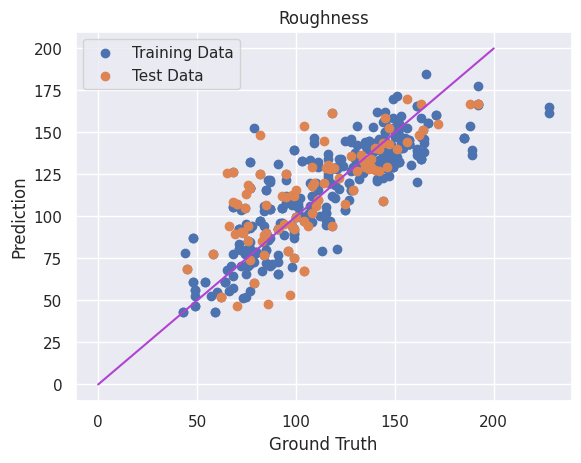

In [25]:
plt.scatter(ds_cleaned.y_train['roughness'], y_train_pred_rough, label='Training Data')
plt.scatter(ds_cleaned.y_test['roughness'], y_test_pred_rough,label='Test Data')
x = [00,200]
y = [00,200]
plt.plot(x,y, color = '#b043d1')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.title('Roughness')
plt.legend()
plt.show()

### Overspray

In [26]:
from  src.models.neural_net import NeuralNetConfig, NeuralNet
from src.evaluation.metrics import Metrics, MetricName
config_mlp_relu = NeuralNetConfig(
    ml_platform='sklearn',
    ml_algo='mlp',
    model_params={'alpha': 0.01, 'learning_rate': 0.0001},
    hidden_layer_size=30,
    activation='relu',
    optimizer='lbfgs',
    epochs=500,
    batch_size=32,
    loss='mse',
)
model_mlp_relu_spray = NeuralNet(config_mlp_relu)

In [27]:
model_mlp_relu_spray.train(x_train_norm, ds_cleaned.y_train['overspray'])

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          151     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.90783D+04    |proj g|=  1.51446D+02

At iterate    1    f=  8.02823D+03    |proj g|=  2.16475D+02

At iterate    2    f=  7.62013D+03    |proj g|=  2.10104D+02

At iterate    3    f=  7.21776D+03    |proj g|=  8.11300D+01

At iterate    4    f=  7.13102D+03    |proj g|=  3.55150D+01

At iterate    5    f=  7.05681D+03    |proj g|=  6.04558D+01

At iterate    6    f=  6.98930D+03    |proj g|=  3.63955D+01

At iterate    7    f=  6.94802D+03    |proj g|=  2.94501D+01

At iterate    8    f=  6.91083D+03    |proj g|=  2.83762D+01

At iterate    9    f=  6.89448D+03    |proj g|=  2.17000D+01

At iterate   10    f=  6.88195D+03    |proj g|=  1.71251D+01

At iterate   11    f=  6.87383D+03    |proj g|=  2.13882D+01

At iterate   12    f=  6.86947D+03    |proj g|=  8.66294D+00

At iterate   13    f=  6.8

/home/computeruser/anaconda3/envs/atomic/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [28]:
y_train_pred_spray =  model_mlp_relu_spray.predict(x_train_norm)
y_test_pred_spray =  model_mlp_relu_spray.predict(x_test_norm)

In [29]:
from sklearn.model_selection import cross_val_score
cv_scores_spray = cross_val_score(model_mlp_relu_spray.model, ds_cleaned.data[Features.get_feature_columns()], ds_cleaned.data[Features.get_target_columns()[0]], cv=5)

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          151     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.11901D+04    |proj g|=  1.10090D+05

At iterate    1    f=  1.40488D+03    |proj g|=  5.87270D+03

At iterate    2    f=  1.26372D+03    |proj g|=  1.10511D+03

At iterate    3    f=  1.25831D+03    |proj g|=  4.56615D+02

At iterate    4    f=  1.25693D+03    |proj g|=  2.28789D+02

At iterate    5    f=  1.25662D+03    |proj g|=  4.91477D+01

At iterate    6    f=  1.25654D+03    |proj g|=  5.82736D+01

At iterate    7    f=  1.25617D+03    |proj g|=  1.86482D+02

At iterate    8    f=  1.25538D+03    |proj g|=  3.67968D+02

At iterate    9    f=  1.25316D+03    |proj g|=  7.14250D+02

At iterate   10    f=  1.24739D+03    |proj g|=  1.24232D+03

At iterate   11    f=  1.13013D+03    |proj g|=  3.47969D+03

At iterate   12    f=  1.12088D+03    |proj g|=  5.29424D+02

At iterate   13    f=  1.1


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate  147    f=  6.16669D+02    |proj g|=  6.86607D+03

At iterate  148    f=  6.16387D+02    |proj g|=  5.57684D+03

At iterate  149    f=  6.16274D+02    |proj g|=  5.02973D+03

At iterate  150    f=  6.15879D+02    |proj g|=  4.11097D+03

At iterate  151    f=  6.14728D+02    |proj g|=  4.43142D+03

At iterate  152    f=  6.14093D+02    |proj g|=  8.27530D+03

At iterate  153    f=  6.11384D+02    |proj g|=  2.11356D+03

At iterate  154    f=  6.10237D+02    |proj g|=  1.77802D+03

At iterate  155    f=  6.09791D+02    |proj g|=  3.54770D+03

At iterate  156    f=  6.09595D+02    |proj g|=  1.42199D+03

At iterate  157    f=  6.09554D+02    |proj g|=  3.29270D+02

At iterate  158    f=  6.09541D+02    |proj g|=  1.30093D+02

At iterate  159    f=  6.09539D+02    |proj g|=  1.38040D+02

At iterate  160    f=  6.09530D+02    |proj g|=  3.33249D+02

At iterate  161    f=  6.09480D+02    |proj g|=  7.79299D+02

At iterate  162    f=  6.09338D+02    |proj g|=  1.40502D+03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   40    f=  1.29667D+03    |proj g|=  1.73397D+02

At iterate   41    f=  1.28527D+03    |proj g|=  9.19440D+03

At iterate   42    f=  1.28103D+03    |proj g|=  1.60559D+03

At iterate   43    f=  1.28019D+03    |proj g|=  3.67561D+02

At iterate   44    f=  1.28016D+03    |proj g|=  1.19906D+02

At iterate   45    f=  1.28016D+03    |proj g|=  9.68724D+00

At iterate   46    f=  1.28015D+03    |proj g|=  4.08595D+01

At iterate   47    f=  1.28015D+03    |proj g|=  1.60148D+02

At iterate   48    f=  1.28014D+03    |proj g|=  3.13374D+02

At iterate   49    f=  1.27999D+03    |proj g|=  8.10129D+02
  ys=-4.113E-01  -gs= 4.767E-02 BFGS update SKIPPED

At iterate   50    f=  1.27999D+03    |proj g|=  8.16870D+02

At iterate   51    f=  1.27998D+03    |proj g|=  4.46641D+02

At iterate   52    f=  1.27997D+03    |proj g|=  2.85941D+02

At iterate   53    f=  1.27996D+03    |proj g|=  5.95853D+01

At iterate   54    f=  1.27996D+03    |proj g|=  6.84654D+01

At iterate   55  

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   47    f=  1.28473D+03    |proj g|=  1.04563D+04

At iterate   48    f=  1.28403D+03    |proj g|=  9.64245D+03

At iterate   49    f=  1.26909D+03    |proj g|=  6.59298D+03

At iterate   50    f=  1.24922D+03    |proj g|=  5.09701D+03

At iterate   51    f=  1.24600D+03    |proj g|=  6.47963D+03

At iterate   52    f=  1.23995D+03    |proj g|=  7.58370D+03

At iterate   53    f=  1.23963D+03    |proj g|=  3.89327D+03

At iterate   54    f=  1.23699D+03    |proj g|=  1.51299D+03

At iterate   55    f=  1.23679D+03    |proj g|=  7.70333D+02

At iterate   56    f=  1.23661D+03    |proj g|=  1.11081D+03

At iterate   57    f=  1.23660D+03    |proj g|=  7.90852D+02

At iterate   58    f=  1.23660D+03    |proj g|=  7.89592D+02

At iterate   59    f=  1.23660D+03    |proj g|=  7.89590D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

In [30]:
cv_scores_spray

array([-0.27645443,  0.30813954, -0.08472446,  0.23143055,  0.39781556])

In [31]:
model_mlp_relu_eval_train_spray = model_mlp_relu_spray.evaluate(x_train_norm, ds_cleaned.y_train['overspray'], evaluation_mat)
model_mlp_relu_eval_test_spray = model_mlp_relu_spray.evaluate(x_test_norm, ds_cleaned.y_test['overspray'], evaluation_mat)

/home/computeruser/research/atomic/my_work/process_property_linkage/src/evaluation/metrics.py:37: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
/home/computeruser/research/atomic/my_work/process_property_linkage/src/evaluation/metrics.py:37: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [32]:
print(model_mlp_relu_eval_train_spray)
print(model_mlp_relu_eval_test_spray)


{'mean_squared_error': 6582.451667697064, 'mean_absolute_error': 63.498915919383094, 'median_absolute_error': 53.22941049417915, 'r2_score': 0.567467336551543, 'root_mean_squared_error': 81.13230964108605, 'mean_absolute_percentage_error': inf}
{'mean_squared_error': 11149.957527953507, 'mean_absolute_error': 85.4229334360305, 'median_absolute_error': 72.54041868018726, 'r2_score': 0.11075978769160622, 'root_mean_squared_error': 105.59335929855393, 'mean_absolute_percentage_error': inf}


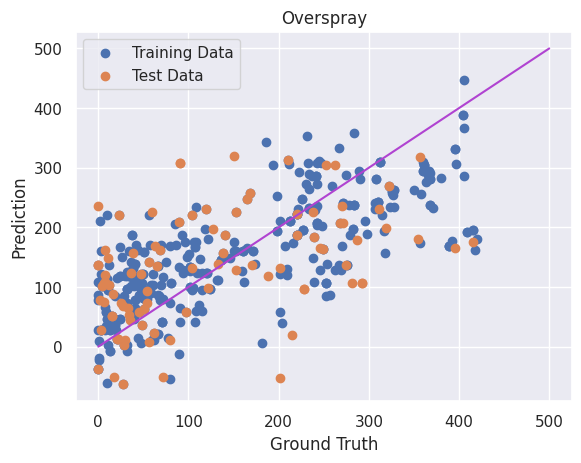

In [33]:
plt.scatter(ds_cleaned.y_train['overspray'], y_train_pred_spray, label='Training Data')
plt.scatter(ds_cleaned.y_test['overspray'], y_test_pred_spray,label='Test Data')
x = [00,500]
y = [00,500]
plt.plot(x,y, color = '#b043d1')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.title('Overspray')
plt.legend()
plt.show()

# OLD CODE

In [17]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import math 

mlp_reg = MLPRegressor(activation ='relu',
                        hidden_layer_sizes = (30),
                        alpha = 0.01,
                        learning_rate_init = 0.0001,
                        solver = 'lbfgs',
                        verbose= True,
                        max_iter =500, 
                      random_state=42)

mlp_reg.fit(x_train_norm, ds_cleaned.y_train['line_width'])

y_train_pred_tmp = mlp_reg.predict(x_train_norm)
y_test_pred_tmp = mlp_reg.predict(x_test_norm)

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          241     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.68526D+04    |proj g|=  2.27896D+02

At iterate    1    f=  5.20781D+03    |proj g|=  3.87579D+02

At iterate    2    f=  4.47561D+03    |proj g|=  5.45321D+02

At iterate    3    f=  1.59117D+03    |proj g|=  2.72924D+02

At iterate    4    f=  9.29635D+02    |proj g|=  4.50812D+01

At iterate    5    f=  9.06789D+02    |proj g|=  2.83056D+01

At iterate    6    f=  8.80126D+02    |proj g|=  2.45588D+01

At iterate    7    f=  8.64849D+02    |proj g|=  2.16504D+01

At iterate    8    f=  8.37925D+02    |proj g|=  2.05168D+01

At iterate    9    f=  8.27580D+02    |proj g|=  2.07298D+01

At iterate   10    f=  8.14785D+02    |proj g|=  1.22649D+01

At iterate   11    f=  8.10335D+02    |proj g|=  6.97971D+00

At iterate   12    f=  8.07603D+02    |proj g|=  4.28911D+00

At iterate   13    f=  8.0

/home/computeruser/anaconda3/envs/atomic/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


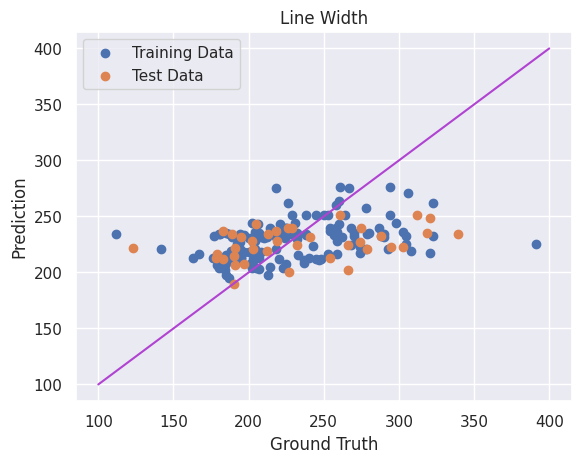

In [18]:
plt.scatter(ds_cleaned.y_train['line_width'], y_train_pred_tmp, label='Training Data')
plt.scatter(ds_cleaned.y_test['line_width'], y_test_pred_tmp,label='Test Data')
x = [100,400]
y = [100,400]
plt.plot(x,y, color = '#b043d1')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.title('Line Width')
plt.legend()
plt.show()

In [20]:
x_train_norm

array([[ 0.57216988, -0.50576526,  1.77571745,  0.59274898,  0.59274898,
         0.59274898],
       [ 0.57216988,  1.86118353, -1.09016621,  0.59274898,  0.59274898,
         0.59274898],
       [ 0.57216988,  2.22846868, -1.29822239,  0.59274898,  0.59274898,
         0.59274898],
       [ 0.57216988,  2.39170653, -1.38159644,  0.59274898,  0.59274898,
         0.59274898],
       [ 0.57216988,  0.88175644, -0.33774591,  0.59274898,  0.59274898,
         0.59274898],
       [ 0.57216988, -0.34252742,  1.40867339,  0.59274898,  0.59274898,
         0.59274898],
       [ 0.57216988,  0.47366182,  0.10397767, -1.68705478, -1.68705478,
        -1.68705478],
       [-1.74118544, -1.36276396, -1.0132347 ,  0.59274898,  0.59274898,
         0.59274898],
       [ 0.57216988,  1.82037406, -1.06477502,  0.59274898,  0.59274898,
         0.59274898],
       [-1.74118544, -1.28114504, -1.16292903,  0.59274898,  0.59274898,
         0.59274898],
       [ 0.57216988,  1.33066052, -0.7256525 ,  0.

In [13]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import math 

mlp_reg = MLPRegressor(activation ='relu',
                        hidden_layer_sizes = (30),
                        alpha = 0.01,
                        learning_rate_init = 0.0001,
                        solver = 'lbfgs',
                        verbose= True,
                        max_iter =500, 
                      random_state=42)

mlp_reg.fit(norm_x_train_cleaned, ds_cleaned.y_train['line_width'])

y_pred_train_tmp = mlp_reg.predict(norm_x_train_cleaned)
pred_y_test_tmp = mlp_reg.predict(norm_x_test_cleaned)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          241     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.68526D+04    |proj g|=  2.27896D+02

At iterate    1    f=  5.20781D+03    |proj g|=  3.87579D+02

At iterate    2    f=  4.47561D+03    |proj g|=  5.45321D+02

At iterate    3    f=  1.59117D+03    |proj g|=  2.72924D+02

At iterate    4    f=  9.29635D+02    |proj g|=  4.50812D+01

At iterate    5    f=  9.06789D+02    |proj g|=  2.83056D+01

At iterate    6    f=  8.80126D+02    |proj g|=  2.45588D+01

At iterate    7    f=  8.64849D+02    |proj g|=  2.16504D+01

At iterate    8    f=  8.37925D+02    |proj g|=  2.05168D+01

At iterate    9    f=  8.27580D+02    |proj g|=  2.07298D+01

At iterate   10    f=  8.14785D+02    |proj g|=  1.22649D+01

At iterate   11    f=  8.10335D+02    |proj g|=  6.97971D+00

At iterate   12    f=  8.07603D+02    |proj g|=  4.28911D+00

At iterate   13    f=  8.0

 This problem is unconstrained.
/home/computeruser/anaconda3/envs/atomic/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [21]:
pred_y_test == pred_y_test_tmp

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [19]:
# Here we define ML model

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import math 

mlp_reg = MLPRegressor(activation ='relu',
                        hidden_layer_sizes = (30),
                        alpha = 0.01,
                        learning_rate_init = 0.0001,
                        solver = 'lbfgs',
                        verbose= True,
                        max_iter =500, 
                      random_state=42)

mlp_reg.fit(x_train_normalized, y_train['line_width'])

y_pred_train = mlp_reg.predict(x_train_normalized)
plt.scatter(y_train['line_width'], y_pred_train, label='Training Data')
R2_train = r2_score(y_train['line_width'],y_pred_train)
print('R2_train =', R2_train)
RSME_train = math.sqrt(mean_squared_error(y_train['line_width'],y_pred_train))
print('RSME_train = ',RSME_train)

y_pred_test = mlp_reg.predict(x_test_normalized)
plt.scatter(y_test['line_width'], y_pred_test,label='Test Data')
R2_test = r2_score(y_test['line_width'],y_pred_test)
print('R2_test =', R2_test)
RSME_test = math.sqrt(mean_squared_error(y_test['line_width'],y_pred_test))
print('RSME_test = ',RSME_test)

x = [100,400]
y = [100,400]
plt.plot(x,y, color = '#b043d1')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.title('Line Width')
plt.legend()
plt.show()

NameError: name 'x_train_normalized' is not defined

In [17]:
# Here we define ML model

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import math 

mlp_reg = MLPRegressor(activation ='relu',
                        hidden_layer_sizes = (30),
                        alpha = 0.01,
                        learning_rate_init = 0.0001,
                        solver = 'lbfgs',
                        verbose= True,
                        max_iter =500, 
                      random_state=42)

mlp_reg.fit(x_train_normalized, y_train['line_width'])

y_pred_train = mlp_reg.predict(x_train_normalized)
plt.scatter(y_train['line_width'], y_pred_train, label='Training Data')
R2_train = r2_score(y_train['line_width'],y_pred_train)
print('R2_train =', R2_train)
RSME_train = math.sqrt(mean_squared_error(y_train['line_width'],y_pred_train))
print('RSME_train = ',RSME_train)

y_pred_test = mlp_reg.predict(x_test_normalized)
plt.scatter(y_test['line_width'], y_pred_test,label='Test Data')
R2_test = r2_score(y_test['line_width'],y_pred_test)
print('R2_test =', R2_test)
RSME_test = math.sqrt(mean_squared_error(y_test['line_width'],y_pred_test))
print('RSME_test = ',RSME_test)

x = [100,400]
y = [100,400]
plt.plot(x,y, color = '#b043d1')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.title('Line Width')
plt.legend()
plt.show()

NameError: name 'x_train_normalized' is not defined

In [ ]:
R2_train = 0.7631930794208385
RSME_train =  21.44942675039149
R2_test = 0.6359015508438468
RSME_test =  24.502041581763386

### Roughness

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          391     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.53321D+03    |proj g|=  1.00550D+02

At iterate    1    f=  8.00159D+02    |proj g|=  9.32935D+01

At iterate    2    f=  5.76833D+02    |proj g|=  8.12473D+01

At iterate    3    f=  3.91936D+02    |proj g|=  2.73895D+01

At iterate    4    f=  3.73387D+02    |proj g|=  2.81857D+01

At iterate    5    f=  3.36035D+02    |proj g|=  1.49854D+01

At iterate    6    f=  3.16334D+02    |proj g|=  9.88023D+00

At iterate    7    f=  3.11335D+02    |proj g|=  1.65952D+01

At iterate    8    f=  3.00839D+02    |proj g|=  5.07667D+00

At iterate    9    f=  2.98115D+02    |proj g|=  5.40154D+00

At iterate   10    f=  2.93185D+02    |proj g|=  7.53867D+00

At iterate   11    f=  2.88060D+02    |proj g|=  6.21547D+00

At iterate   12    f=  2.82880D+02    |proj g|=  5.08324D+00

At iterate   13    f=  2.7

 This problem is unconstrained.



At iterate  463    f=  5.29136D+01    |proj g|=  3.60639D+00

At iterate  464    f=  5.28446D+01    |proj g|=  3.72175D+00

At iterate  465    f=  5.27556D+01    |proj g|=  3.39756D+00

At iterate  466    f=  5.26716D+01    |proj g|=  3.94085D+00

At iterate  467    f=  5.25917D+01    |proj g|=  3.89742D+00

At iterate  468    f=  5.25370D+01    |proj g|=  4.12566D+00

At iterate  469    f=  5.24324D+01    |proj g|=  3.01303D+00

At iterate  470    f=  5.23524D+01    |proj g|=  4.12455D+00

At iterate  471    f=  5.23288D+01    |proj g|=  3.86704D+00

At iterate  472    f=  5.21785D+01    |proj g|=  2.91536D+00

At iterate  473    f=  5.20348D+01    |proj g|=  3.86802D+00

At iterate  474    f=  5.19226D+01    |proj g|=  3.29039D+00

At iterate  475    f=  5.18296D+01    |proj g|=  3.34808D+00

At iterate  476    f=  5.17397D+01    |proj g|=  3.21000D+00

At iterate  477    f=  5.16422D+01    |proj g|=  3.74195D+00

At iterate  478    f=  5.15813D+01    |proj g|=  3.67022D+00

At iter

/home/computeruser/anaconda3/envs/atomic/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


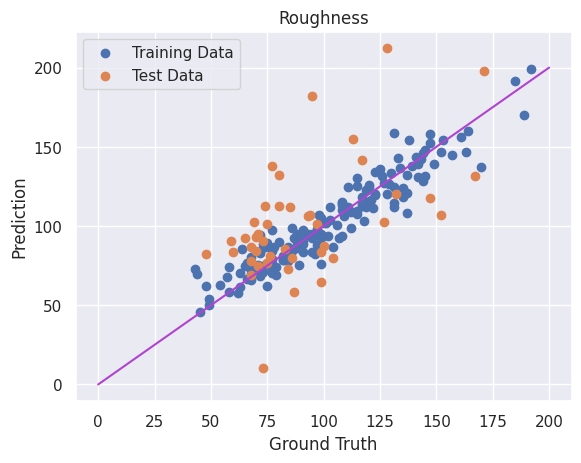

In [25]:
mlp_reg.fit(x_train_normalized, y_train['roughness'])

y_pred_train = mlp_reg.predict(x_train_normalized)
plt.scatter(y_train['roughness'], y_pred_train,label='Training Data')
R2_train = r2_score(y_train['roughness'],y_pred_train)
print('R2_train =', R2_train)
RSME_train = math.sqrt(mean_squared_error(y_train['roughness'],y_pred_train))
print('RSME_train = ',RSME_train)


y_pred_test = mlp_reg.predict(x_test_normalized)
plt.scatter(y_test['roughness'], y_pred_test, label='Test Data')
R2_test = r2_score(y_test['roughness'],y_pred_test)
print('R2_test =', R2_test)
RSME_test = math.sqrt(mean_squared_error(y_test['roughness'],y_pred_test))
print('RSME_test = ',RSME_test)

x = [0,200]
y = [0,200]
plt.plot(x,y, color = '#b043d1')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.title('Roughness')
plt.legend()
plt.show()

### Overspray Outlier treatment and normalization

In [26]:
df_all_features_print_os_o = df_all_features_print.drop(df_all_features_print.index[df_all_features_print['overspray'] >450])

# Set features, target
from sklearn.model_selection import train_test_split
features = df_all_features_print_os_o[list_inp_features]
target = df_all_features_print_os_o[list_opt_features]

# set test and train
x_train_os, x_test_os, y_train_os, y_test_os = train_test_split(features,target, test_size=0.2 ,random_state=r_seed)

# Normalization 
x_train_os_std = x_train_os.std()
x_train_os_mean = x_train_os.mean()
x_train_os_normalized = pd.DataFrame()
for column in range (0,len(x_train_os.columns)): # This section reads each column of the input file and calculates the RMS
    x_train_os_normalized[x_train_os.columns[column]] = (x_train_os.iloc[:,column]-x_train_os_mean[column])/x_train_os_std[column]

    

x_test_os_normalized = pd.DataFrame()
for column in range (0,len(x_test_os.columns)): # This section reads each column of the input file and calculates the RMS
    x_test_os_normalized[x_test_os.columns[column]] = (x_test_os.iloc[:,column]-x_train_os_mean[column])/x_train_os_std[column]

  

In [27]:
print(len(df_all_features_print), len(df_all_features_print_os_o))
print(len(x_train_os), len(x_test_os))

211 188
150 38


### Overspray Predict

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          391     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08079D+04    |proj g|=  9.94811D+01

At iterate    1    f=  5.36893D+03    |proj g|=  6.97086D+01

At iterate    2    f=  5.20601D+03    |proj g|=  6.85108D+01

At iterate    3    f=  4.93087D+03    |proj g|=  5.91782D+01

At iterate    4    f=  4.81540D+03    |proj g|=  3.15804D+01

At iterate    5    f=  4.74839D+03    |proj g|=  3.26941D+01

At iterate    6    f=  4.67470D+03    |proj g|=  3.94262D+01

At iterate    7    f=  4.57770D+03    |proj g|=  3.69520D+01

At iterate    8    f=  4.47715D+03    |proj g|=  2.32441D+01

At iterate    9    f=  4.38490D+03    |proj g|=  1.60886D+01

At iterate   10    f=  4.31702D+03    |proj g|=  1.69047D+01

At iterate   11    f=  4.25172D+03    |proj g|=  1.96472D+01

At iterate   12    f=  4.20944D+03    |proj g|=  1.16079D+01

At iterate   13    f=  4.1

 This problem is unconstrained.
/home/computeruser/anaconda3/envs/atomic/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


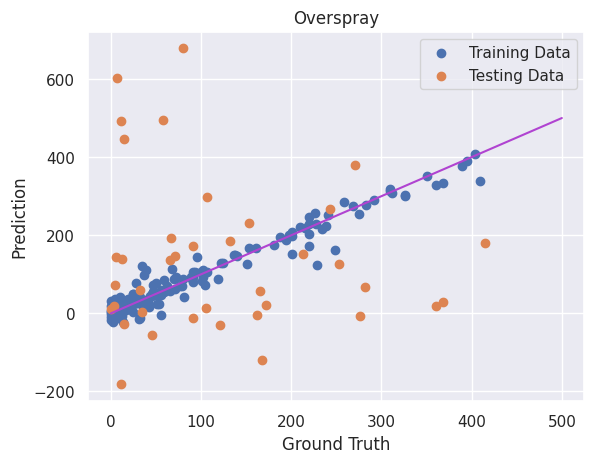

In [28]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
# instantiate a neural network 
# lbfgs optimizer used to train the neural network- converges well for small data

'''
mlp_reg = MLPRegressor(activation ='relu',
                        hidden_layer_sizes = (30),
                        alpha = 0.01,
                        learning_rate_init = 0.0001,
                        solver = 'lbfgs',
                        verbose= True,
                        max_iter =500, 
                      random_state=r_seed)
'''
mlp_reg.fit(x_train_os_normalized, y_train_os['overspray'])


y_pred_train_os = mlp_reg.predict(x_train_os_normalized)
plt.scatter(y_train_os['overspray'], y_pred_train_os, label='Training Data')
R2_train_os = r2_score(y_train_os['overspray'],y_pred_train_os)
print('R2_train =', R2_train_os)
RSME_train_os = math.sqrt(mean_squared_error(y_train_os['overspray'],y_pred_train_os))
print('RSME_train = ',RSME_train)


y_pred_test_os = mlp_reg.predict(x_test_os_normalized)
plt.scatter(y_test_os['overspray'], y_pred_test_os, label='Testing Data')
R2_test_os = r2_score(y_test_os['overspray'],y_pred_test_os)
print('R2_test =', R2_test_os)
RSME_test_os = math.sqrt(mean_squared_error(y_test_os['overspray'],y_pred_test_os))
print('RSME_test = ',RSME_test_os)

x = [0,500]
y = [0,500]
plt.plot(x,y, color = '#b043d1')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.title('Overspray')
plt.legend()
plt.show()

## Local library import
We import all the required local libraries libraries

# Parameter definition
We set all relevant parameters for our notebook. By convention, parameters are uppercase, while all the 
other variables follow Python's guidelines.

# Prediction Algos

In [36]:
def highlight_rows_rmse(row, asking_value):
    cur_value = row.loc['RMSE']
    if cur_value < asking_value:
        color = '#4808c9'
        font_weight = 'normal'
    elif cur_value == asking_value:
        color = '#BAFFC9' 
        font_weight = 'normal'
    else:
        color = '#222222' 
        font_weight = 'normal'
    return [f'color: {color}; font-weight: {font_weight}' for r in row]

## Line width

R2_train = 0.7631930794208385

RSME_train =  21.44942675039149

R2_test = 0.6359015508438468

RSME_test =  24.502041581763386

`paper` : 23.7

In [37]:
#import pyforest
from lazypredict.Supervised import LazyRegressor
from pandas.plotting import scatter_matrix

reg = LazyRegressor(ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(x_train_normalized, x_test_normalized, y_train['width_line'], y_test['width_line'])

models.reset_index(drop = False, inplace = True)

100%|██████████| 42/42 [00:02<00:00, 14.27it/s]


In [38]:
HTML(models[['Model','Adjusted R-Squared', 'R-Squared', 'RMSE']].style.apply(lambda x: highlight_rows_rmse(x, 24.50),axis=1).to_html())

,Model,Adjusted R-Squared,R-Squared,RMSE
0,BaggingRegressor,0.665906,0.690963,22.573463
1,Lasso,0.624713,0.652860,23.924641
2,PoissonRegressor,0.624413,0.652582,23.934220
3,LGBMRegressor,0.621479,0.649868,24.027500
4,HistGradientBoostingRegressor,0.621479,0.649868,24.027500
5,ElasticNetCV,0.620909,0.649341,24.045590
6,BayesianRidge,0.618056,0.646702,24.135889
7,Ridge,0.616996,0.645722,24.169361
8,RidgeCV,0.616996,0.645722,24.169361
9,LassoCV,0.616296,0.645073,24.191462


## Roughness

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
R2_train = 0.4661703381670843

RSME_train =  22.759895306737544

R2_test = 0.1668281136369445

RSME_test =  25.982118043893102

`paper` :  19.4

In [39]:
#import pyforest
from lazypredict.Supervised import LazyRegressor
from pandas.plotting import scatter_matrix

reg = LazyRegressor(ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(x_train_normalized, x_test_normalized, y_train['roughness'], y_test['roughness'])
models.reset_index(drop = False, inplace = True)

100%|██████████| 42/42 [00:01<00:00, 38.17it/s]


In [40]:
HTML(models[['Model','Adjusted R-Squared', 'R-Squared', 'RMSE']].style.apply(lambda x: highlight_rows_rmse(x, 25.98),axis=1).to_html())

,Model,Adjusted R-Squared,R-Squared,RMSE
0,LGBMRegressor,0.383016,0.429290,21.503797
1,HistGradientBoostingRegressor,0.383016,0.429290,21.503797
2,BaggingRegressor,0.350972,0.399649,22.055136
3,OrthogonalMatchingPursuit,0.318119,0.369260,22.606448
4,HuberRegressor,0.305981,0.358033,22.806766
5,PassiveAggressiveRegressor,0.301496,0.353884,22.880344
6,PoissonRegressor,0.300302,0.352780,22.899885
7,LassoCV,0.277561,0.331744,23.269052
8,LarsCV,0.277512,0.331699,23.269840
9,LassoLarsCV,0.277512,0.331699,23.269840


## Overspray

R2_train = 0.475805274317867

RSME_train =  22.759895306737544

R2_test = -0.3540476835932973

RSME_test =  102.78647489238195

`paper` : 67/129

In [41]:
#import pyforest
from lazypredict.Supervised import LazyRegressor
from pandas.plotting import scatter_matrix

reg = LazyRegressor(ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(x_train_os_normalized, x_test_os_normalized, y_train_os['Overspray'], y_test_os['Overspray'])
models.reset_index(drop = False, inplace = True)

 36%|███▌      | 15/42 [00:00<00:00, 47.00it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


100%|██████████| 42/42 [00:01<00:00, 38.18it/s]


In [42]:
HTML(models[['Model','Adjusted R-Squared', 'R-Squared', 'RMSE']].style.apply(lambda x: highlight_rows_rmse(x, 102.78),axis=1).to_html())

,Model,Adjusted R-Squared,R-Squared,RMSE
0,NuSVR,-0.078923,0.010988,87.845565
1,LGBMRegressor,-0.096644,-0.005257,88.564070
2,HistGradientBoostingRegressor,-0.096644,-0.005257,88.564070
3,TweedieRegressor,-0.105742,-0.013596,88.930662
4,DummyRegressor,-0.110447,-0.017910,89.119686
5,ElasticNetCV,-0.113340,-0.020561,89.235689
6,ElasticNet,-0.118597,-0.025380,89.446107
7,LassoLars,-0.124876,-0.031137,89.696833
8,BayesianRidge,-0.131091,-0.036834,89.944273
9,KNeighborsRegressor,-0.138784,-0.043885,90.249612


# Oversampling

## SMOTE 1K

In [114]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
import ImbalancedLearningRegression as iblr
import smogn

In [120]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
import ImbalancedLearningRegression as iblr
import smogn

df_all_features_print_normalized_sample_line = smogn.smoter(
    data = df_all_features_print_modified_overspray.iloc[:,:], 
    y = 'line_width',
)

df_all_features_print_normalized_sample_roughness = smogn.smoter(
    data = df_all_features_print_modified_overspray.iloc[:,:], 
    y = 'roughness',
)

df_all_features_print_normalized_sample_overspray = smogn.smoter(
    data = df_all_features_print_modified_overspray.iloc[:,:], 
    y = 'overspray',
)


# Apply the oversampling technique to each target variable separately
# X_resampled_line, y_resampled_line = smote_line.fit_resample(df_all_features_print_normalized[list_inp_features], df_all_features_print_normalized[list_opt_features[0]])
# X_resampled_roughness, y_resampled_roughness = smote_roughness.fit_resample(df_all_features_print_normalized[list_inp_features], df_all_features_print_normalized[list_opt_features[1]])
# X_resampled_spray, y_resampled_spray = smote_spray.fit_resample(df_all_features_print_normalized[list_inp_features], df_all_features_print_normalized[list_opt_features[2]])

# Combine the oversampled datasets for each target variable
# y_resampled = np.hstack((y_resampled_line.values.reshape(-1, 1), y_resampled_roughness.values.reshape(-1, 1), y_resampled_spray.values.reshape(-1, 1)))
# X_resampled = np.vstack((X_resampled_line, X_resampled_roughness, X_resampled_spray))

/home/computeruser/anaconda3/envs/atomic/lib/python3.9/site-packages/smogn/smoter.py:200: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  b_index.update({i: y_sort[bumps[i]:bumps[i + 1]]})
/home/computeruser/anaconda3/envs/atomic/lib/python3.9/site-packages/smogn/over_sampling.py:128: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:, j] = pd.Categorical(pd.factorize(
/home/computeruser/anaconda3/envs/atomic/lib/python3.9/site-packages/smogn/over_sampling.py:128: FutureWarning: In a future version, `df.iloc[:

In [123]:
df_all_features_print_normalized_sample_overspray

,print_id,print_height,nozzle_voltage_x,drop_spacing_x,line_width,overspray,roughness,initials,print_head_id,substrate_thickness,...,waveform_file,no_of_layers,ink_visco_cp,ink_visco_pas,surface_tension_dyne_cm,surface_tension_n_m,ink _density,nozzle_diameter,particle_size,z_number
0,162,699,36,9,302,227,151,05.04.22 / A.T,281985.0232.3621.01,200,...,samba waveform_Fataneh 3-3-22,1,6.896373,0.006899,32.308731,0.032298,1613,21.5,36,4.850439
1,161,699,37,8,302,226,151,05.04.22 / A.T,281985.0232.3621.01,200,...,samba waveform_Fataneh 3-3-22,1,6.901862,0.006903,32.298710,0.032288,1614,21.5,36,4.852401
2,166,700,36,16,200,227,104,05.04.22 / A.T,281985.0232.3621.01,200,...,samba waveform_Fataneh 3-3-22,1,6.902260,0.006903,32.297268,0.032293,1614,21.5,36,4.851453
3,168,700,37,15,199,228,103,05.04.22 / A.T,281985.0232.3621.01,200,...,samba waveform_Fataneh 3-3-22,1,6.905566,0.006898,32.309348,0.032303,1613,21.5,36,4.850942
4,153,700,33,8,278,233,100,05.04.22 / A.T,281985.0232.3621.01,200,...,samba waveform_Fataneh 3-3-22,1,6.898145,0.006897,32.286781,0.032298,1614,21.5,36,4.851894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,199,650,28,16,191,81,99,05.26.22 / C.F,281985.0232.3621.01,200,...,samba waveform_Fataneh 3-3-22,1,6.900000,0.006900,32.300000,0.032300,1614,21.5,36,4.852027
178,200,650,28,17,212,282,72,05.26.22 / C.F,281985.0232.3621.01,200,...,samba waveform_Fataneh 3-3-22,1,6.900000,0.006900,32.300000,0.032300,1614,21.5,36,4.852027
179,201,650,31,8,323,47,157,05.31.22 / C.F,281985.0232.3621.01,200,...,samba waveform_Fataneh 3-3-22,1,6.900000,0.006900,32.300000,0.032300,1614,21.5,36,4.852027
181,203,650,31,10,288,107,85,05.31.22 / C.F,281985.0232.3621.01,200,...,samba waveform_Fataneh 3-3-22,1,6.900000,0.006900,32.300000,0.032300,1614,21.5,36,4.852027


In [59]:
# Set features, target
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

features = df_all_features_print_modified_overspray[list_inp_features]
target = df_all_features_print_modified_overspray[list_opt_features]

scaler_norm = StandardScaler()
ary_all_features_print_normalized = scaler_norm.fit_transform(df_all_features_print_modified_overspray[list_inp_features+list_opt_features])

df_all_features_print_normalized = pd.DataFrame(ary_all_features_print_normalized, index=df_all_features_print_modified_overspray.index, columns=[list_inp_features+list_opt_features])

In [69]:
df_all_features_print_normalized[list_inp_features+[list_opt_features[0]]]

,nozzle_voltage_x,distance,ink_visco_cp,ink _density,velocity,drop_spacing_x,surface_tension_dyne_cm,drop_spacing_y,time,cartridge_print_height,nozzle_voltage_y,line_width
0,-1.335952,-1.793171,-1.707825,-1.707825,-0.957976,-1.541502,-1.707825,-1.541502,-1.508307,1.228252,-1.335952,1.478566
1,-1.335952,-1.793171,-1.707825,-1.707825,-0.957976,-1.194848,-1.707825,-1.194848,-1.508307,1.228252,-1.335952,0.723709
2,-1.335952,-1.679511,-1.707825,-1.707825,-0.975453,-0.848195,-1.707825,-0.848195,-1.345854,1.228252,-1.335952,-0.259893
3,-1.335952,-1.679511,-1.707825,-1.707825,-1.384642,-0.501541,-1.707825,-0.501541,-1.102174,1.228252,-1.335952,-0.900377
4,-1.335952,-1.679511,-1.707825,-1.707825,-1.195055,-0.154888,-1.707825,-0.154888,-1.224014,1.228252,-1.335952,-0.900377
...,...,...,...,...,...,...,...,...,...,...,...,...
206,-0.145625,0.593693,0.585540,0.585540,-0.413151,-0.154888,0.585540,-0.154888,1.009714,-1.634286,-0.145625,0.746583
207,-0.145625,0.593693,0.585540,0.585540,-0.413151,0.191766,0.585540,0.191766,1.009714,-1.634286,-0.145625,0.266220
208,-0.145625,0.593693,0.585540,0.585540,-0.413151,0.538419,0.585540,0.538419,1.009714,-1.634286,-0.145625,-0.877503
209,-0.145625,0.593693,0.585540,0.585540,-0.808916,1.231726,0.585540,1.231726,1.497073,-1.634286,-0.145625,-0.946126


In [117]:
df_all_features_print_modified_overspray.reset_index(drop = True, inplace = True)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [49]:
smote_line = SMOTE( random_state=42)
smote_roughness = RandomOverSampler(sampling_strategy='minority', random_state=42)
smote_spray = RandomOverSampler(sampling_strategy='minority', random_state=42)

# Apply the oversampling technique to each target variable separately
X_resampled_line, y_resampled_line = smote_line.fit_resample(df_all_features_print_normalized[list_inp_features], df_all_features_print_normalized[list_opt_features[0]])
X_resampled_roughness, y_resampled_roughness = smote_roughness.fit_resample(df_all_features_print_normalized[list_inp_features], df_all_features_print_normalized[list_opt_features[1]])
X_resampled_spray, y_resampled_spray = smote_spray.fit_resample(df_all_features_print_normalized[list_inp_features], df_all_features_print_normalized[list_opt_features[2]])

# Combine the oversampled datasets for each target variable
y_resampled = np.hstack((y_resampled_line.values.reshape(-1, 1), y_resampled_roughness.values.reshape(-1, 1), y_resampled_spray.values.reshape(-1, 1)))
X_resampled = np.vstack((X_resampled_line, X_resampled_roughness, X_resampled_spray))

ValueError: Unknown label type: 'continuous'

In [46]:
df_all_features_print_normalized

,nozzle_voltage_x,distance,ink_visco_cp,ink _density,velocity,drop_spacing_x,surface_tension_dyne_cm,drop_spacing_y,time,cartridge_print_height,nozzle_voltage_y,line_width,roughness,overspray
0,-1.335952,-1.793171,-1.707825,-1.707825,-0.957976,-1.541502,-1.707825,-1.541502,-1.508307,1.228252,-1.335952,1.478566,2.149737,-0.845568
1,-1.335952,-1.793171,-1.707825,-1.707825,-0.957976,-1.194848,-1.707825,-1.194848,-1.508307,1.228252,-1.335952,0.723709,1.400163,0.283858
2,-1.335952,-1.679511,-1.707825,-1.707825,-0.975453,-0.848195,-1.707825,-0.848195,-1.345854,1.228252,-1.335952,-0.259893,0.161737,-0.854676
3,-1.335952,-1.679511,-1.707825,-1.707825,-1.384642,-0.501541,-1.707825,-0.501541,-1.102174,1.228252,-1.335952,-0.900377,-0.978918,-0.818243
4,-1.335952,-1.679511,-1.707825,-1.707825,-1.195055,-0.154888,-1.707825,-0.154888,-1.224014,1.228252,-1.335952,-0.900377,-0.261935,-0.126014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,-0.145625,0.593693,0.585540,0.585540,-0.413151,-0.154888,0.585540,-0.154888,1.009714,-1.634286,-0.145625,0.746583,-0.131574,-0.800026
207,-0.145625,0.593693,0.585540,0.585540,-0.413151,0.191766,0.585540,0.191766,1.009714,-1.634286,-0.145625,0.266220,-0.392295,-0.818243
208,-0.145625,0.593693,0.585540,0.585540,-0.413151,0.538419,0.585540,0.538419,1.009714,-1.634286,-0.145625,-0.877503,-0.359705,-0.253530
209,-0.145625,0.593693,0.585540,0.585540,-0.808916,1.231726,0.585540,1.231726,1.497073,-1.634286,-0.145625,-0.946126,-0.815967,-0.945759


In [ ]:

# set test and train
x_train_norm_os, x_test_norm_os, y_train_norm_os, y_test_norm_os = train_test_split(
    df_all_features_print_modified_overspray[list_inp_features],
    df_all_features_print_modified_overspray[list_opt_features], 
    test_size=0.2 ,random_state=42
    )

#  Interpretation

## PDP

### Generalized additive models
- https://pygam.readthedocs.io/en/latest/notebooks/tour_of_pygam.html

In [51]:
from pygam import LinearGAM, LogisticGAM

100% (205 of 205) |######################| Elapsed Time: 0:00:02 Time:  0:00:02


<Figure size 640x480 with 0 Axes>

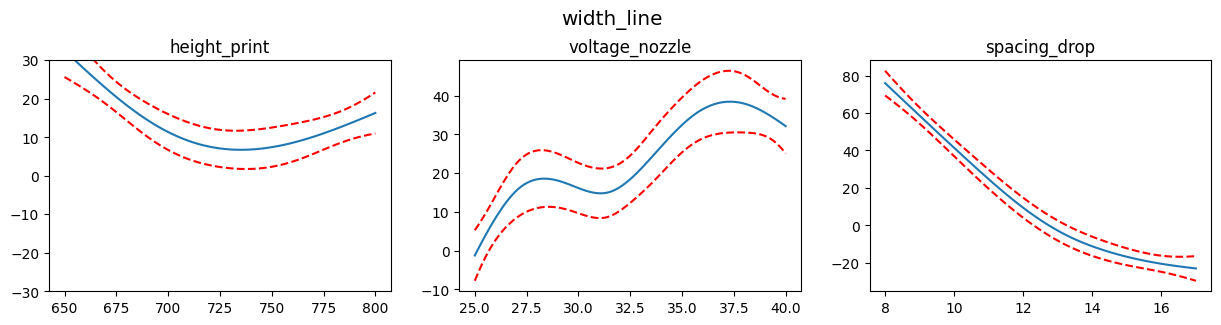

In [80]:
target_to_analyze = 'width_line'

lams = np.random.rand(len(df_features), 3)
lams = lams * 3
lams = np.exp(lams)
gam = LinearGAM(n_splines=10).gridsearch(df_features[columns_features].values, df_features[target_to_analyze].values, lam=lams)


titles = columns_features#redwine.columns[0:11]
plt.figure()
fig, axs = plt.subplots(1,3,figsize=(15, 3))
st = fig.suptitle(target_to_analyze, fontsize='x-large')

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i])
    
st.set_y(1.05)
plt.show()

100% (205 of 205) |######################| Elapsed Time: 0:00:02 Time:  0:00:02


<Figure size 640x480 with 0 Axes>

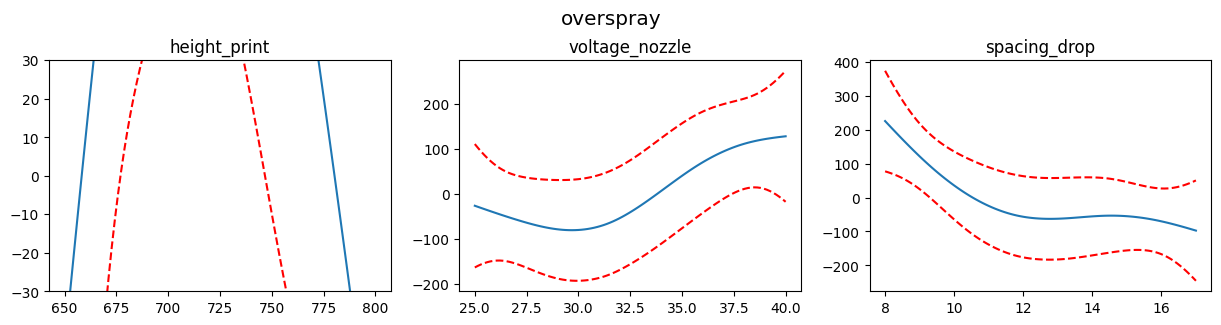

In [81]:
target_to_analyze = 'overspray'

lams = np.random.rand(len(df_features), 3)
lams = lams * 3
lams = np.exp(lams)
gam = LinearGAM(n_splines=10).gridsearch(df_features[columns_features].values, df_features[target_to_analyze].values, lam=lams)


titles = columns_features#redwine.columns[0:11]
plt.figure()
fig, axs = plt.subplots(1,3,figsize=(15, 3))
st = fig.suptitle(target_to_analyze, fontsize='x-large')

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i])
    
st.set_y(1.05)
plt.show()

100% (205 of 205) |######################| Elapsed Time: 0:00:02 Time:  0:00:02


<Figure size 640x480 with 0 Axes>

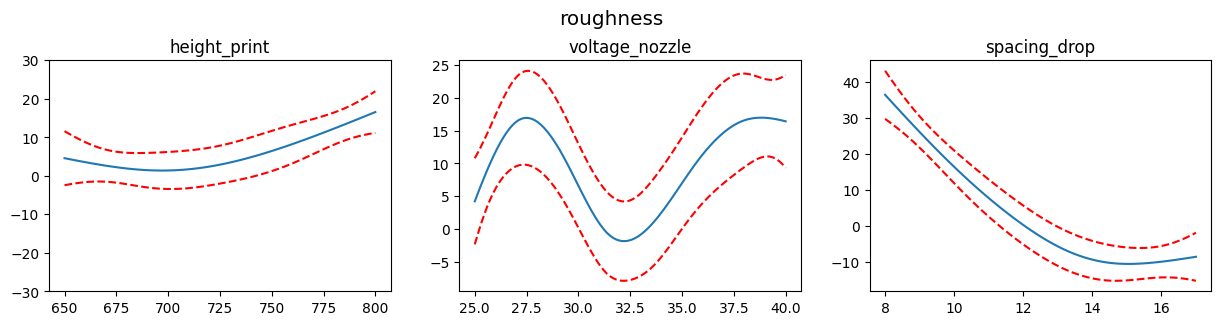

In [82]:
target_to_analyze = 'roughness'

lams = np.random.rand(len(df_features), 3)
lams = lams * 3
lams = np.exp(lams)
gam = LinearGAM(n_splines=10).gridsearch(df_features[columns_features].values, df_features[target_to_analyze].values, lam=lams)


titles = columns_features#redwine.columns[0:11]
plt.figure()
fig, axs = plt.subplots(1,3,figsize=(15, 3))
st = fig.suptitle(target_to_analyze, fontsize='x-large')

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i])
    
st.set_y(1.05)
plt.show()

### sklearn :: mlp

In [116]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler#MinMaxScaler#StandardScaler
from sklearn.neural_network import MLPRegressor

In [129]:
target_to_analyze = 'width_line'

est = make_pipeline(
    StandardScaler(),
    MLPRegressor(
        hidden_layer_sizes=( 70, 30),
        learning_rate_init=0.01,
        solver='adam',
        early_stopping=False,
        random_state=r_seed,
    ),
)
est.fit(df_features[columns_features], df_features[target_to_analyze])

print(f"Test R2 score: {est.score(df_features[columns_features], df_features[target_to_analyze]):.2f}")

Test R2 score: 0.67


<Figure size 640x480 with 0 Axes>

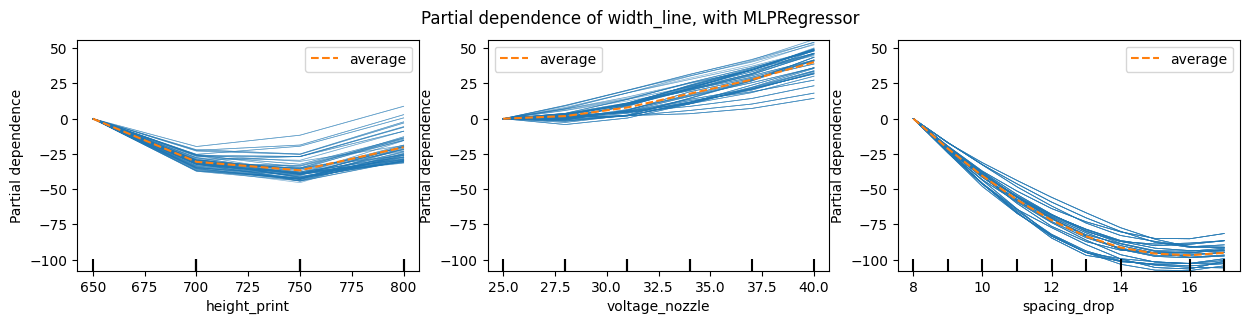

In [142]:
from sklearn.inspection import PartialDependenceDisplay

common_params = {
    "subsample": 200,
    "n_jobs": 2,
    "grid_resolution": 40,
    "centered": True,
    "random_state": r_seed,
}

plt.figure()
fig, axs = plt.subplots(1,3,figsize=(15, 3))

display = PartialDependenceDisplay.from_estimator(
    est,
    df_features[columns_features],
    features=columns_features,
    kind="both",
    **common_params,ax = axs
)

display.figure_.suptitle(f'Partial dependence of {target_to_analyze}, with MLPRegressor')
display.figure_.subplots_adjust(hspace=0.3)

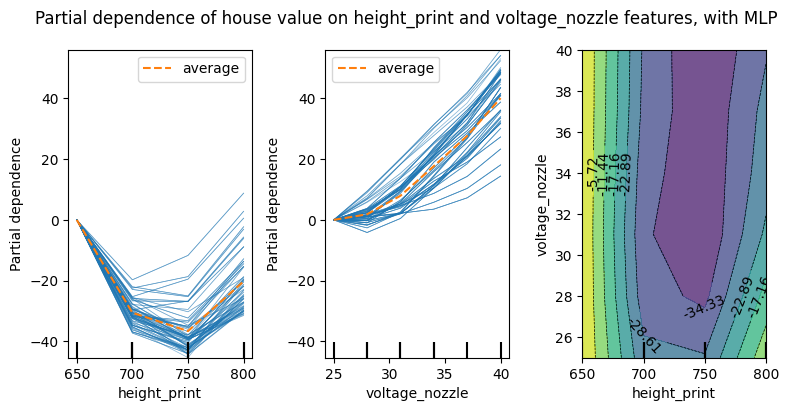

In [146]:
_, ax = plt.subplots(ncols=3, figsize=(9, 4))

# Note that we could have called the method `from_estimator` three times and
# provide one feature, one kind of plot, and one axis for each call.
display = PartialDependenceDisplay.from_estimator(
    est,
    df_features[columns_features],
    features=["height_print", "voltage_nozzle", ("height_print", "voltage_nozzle")],
    kind=["both", "both", "average"],
    ax=ax,
    **common_params,
)

display.figure_.suptitle(
    f"Partial dependence of house value on height_print and voltage_nozzle features, with MLP"
)
display.figure_.subplots_adjust(wspace=0.4, hspace=0.3)


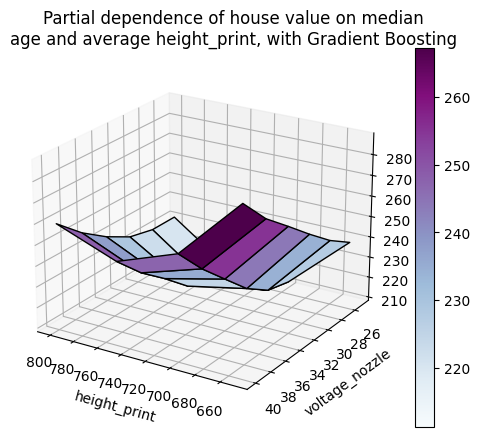

In [148]:
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.inspection import partial_dependence

fig = plt.figure()

features = ("height_print", "voltage_nozzle")
pdp = partial_dependence(
    est, df_features[columns_features], features=features, kind="average", grid_resolution=10
)
XX, YY = np.meshgrid(pdp["values"][0], pdp["values"][1])
Z = pdp.average[0].T
ax = fig.add_subplot(projection="3d")
fig.add_axes(ax)

surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1, cmap=plt.cm.BuPu, edgecolor="k")
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel("Partial dependence")
# pretty init view
ax.view_init(elev=22, azim=122)
plt.colorbar(surf)
plt.suptitle(
    "Partial dependence of house value on median\n"
    "age and average height_print, with Gradient Boosting"
)
plt.subplots_adjust(top=0.9)
plt.show()


### SHAP

  0%|          | 0/37 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

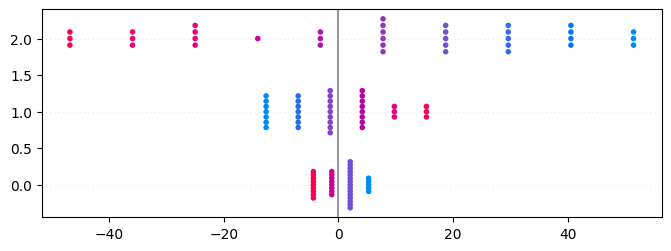

In [294]:
from sklearn import linear_model
import shap

lin_regr = linear_model.LinearRegression()
lin_regr.fit(x_train_normalized.values, y_train['width_line'].values)

## Explaining all the instances
x_train_normalized_summary = shap.kmeans(x_train_normalized, 10)
ex = shap.KernelExplainer(lin_regr.predict, x_train_normalized_summary)

shap_values = ex.shap_values(x_test_normalized)
shap.summary_plot(shap_values, x_test_normalized, show=False)
plt.gcf().axes[-1].set_aspect(100)
plt.gcf().axes[-1].set_box_aspect(100)

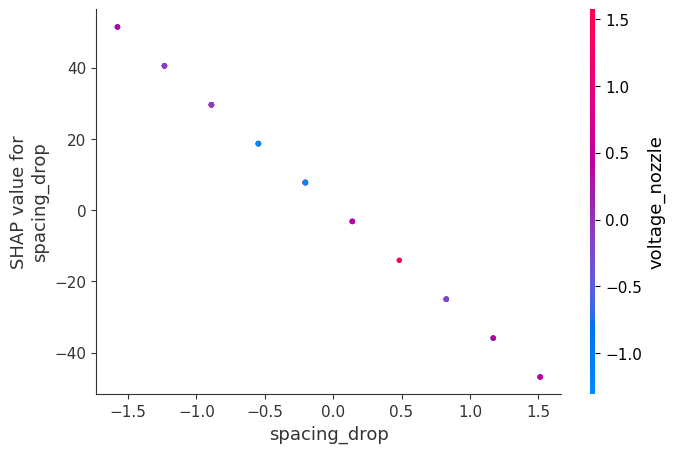

In [303]:
shap.dependence_plot("spacing_drop", shap_values, x_test_normalized)

# References
We report here relevant references:
1. author1, article1, journal1, year1, url1
2. author2, article2, journal2, year2, url2

In [305]:
!/home/computeruser/anaconda3/envs/atomic/bin/pip install lazypredict

  Using cached lazypredict-0.2.9-py2.py3-none-any.whl (12 kB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached pandas-1.0.5.tar.gz (5.0 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... |^C
anceled
ERROR: Operation cancelled by user


In [289]:
import matplotlib
matplotlib.__version__

'3.6.0'

In [25]:
pd.DataFrame([{'ml_algo':1, 'train_acc':2}, {'ml_algo': 100, 'train_acc':200}])

,ml_algo,train_acc
0,1,2
1,100,200


In [44]:
!/home/computeruser/anaconda3/envs/atomic/bin/pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 4.6 MB/s eta 0:00:00a 0:00:01
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.0
    Uninstalling joblib-1.0.0:
      Successfully uninstalled joblib-1.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lazypredict 0.2.9 requires joblib==1.0.0, but you have joblib 1.2.0 which is incompatible.
lazypredict 0.2.9 requires PyYAML==5.4, but you have pyyaml 6.0 which is incompatible.
lazypredict 0.2.9 requires six==1.15.0, but you have six 1.16.0 which is incompatible.


In [49]:
# check version number
#Smooth
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy=0.5)
X_over, y_over = oversample.fit_resample(Print_Database[['Print Height','Nozzle Voltage','Drop Spacing']].add_suffixvalues, Print_Database['Overspray'])

ValueError: "sampling_strategy" can be a float only when the type of target is binary. For multi-class, use a dict.